In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from ultralytics import SAM
import os

In [2]:
# Please check the documentation at https://docs.ultralytics.com/models/sam-2
# to get the latest models
model = SAM("sam2.1_b.pt")
model.info()

100%|██████████| 154M/154M [00:10<00:00, 15.9MB/s] 


Model summary: 566 layers, 80,850,178 parameters, 80,850,178 gradients


(566, 80850178, 80850178, 0.0)

# Image Definition

In [3]:
IMAGE = "Samples/sample_9.jpg"

In [4]:
# skimage_loaded_image = io.imread(IMAGE)
pil_loaded_image = Image.open(IMAGE)
numpy_image = np.array(Image.open(IMAGE))

In [5]:
# The model can take in an image path or a PIL image object
# results_path = model(IMAGE, points=[320, 320], labels=[1])
results_pil = model(pil_loaded_image, points=[320, 320], labels=[1])

c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\ultralytics\models\sam\modules\blocks.py:569: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  x = F.scaled_dot_product_attention(


0: 1024x1024 1 0, 2035.5ms
Speed: 182.3ms preprocess, 2035.5ms inference, 55.6ms postprocess per image at shape (1, 3, 1024, 1024)


# Segmentation from PIL Object

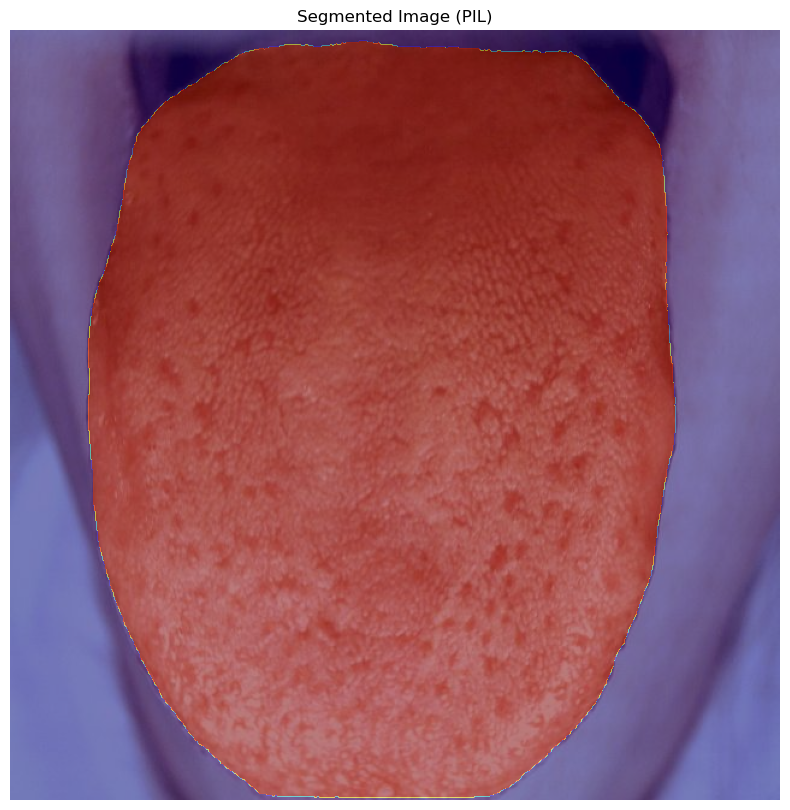

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(pil_loaded_image)

# Get the mask from the results
mask_pil = results_pil[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask_pil, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image (PIL)')
plt.show()

# Masking

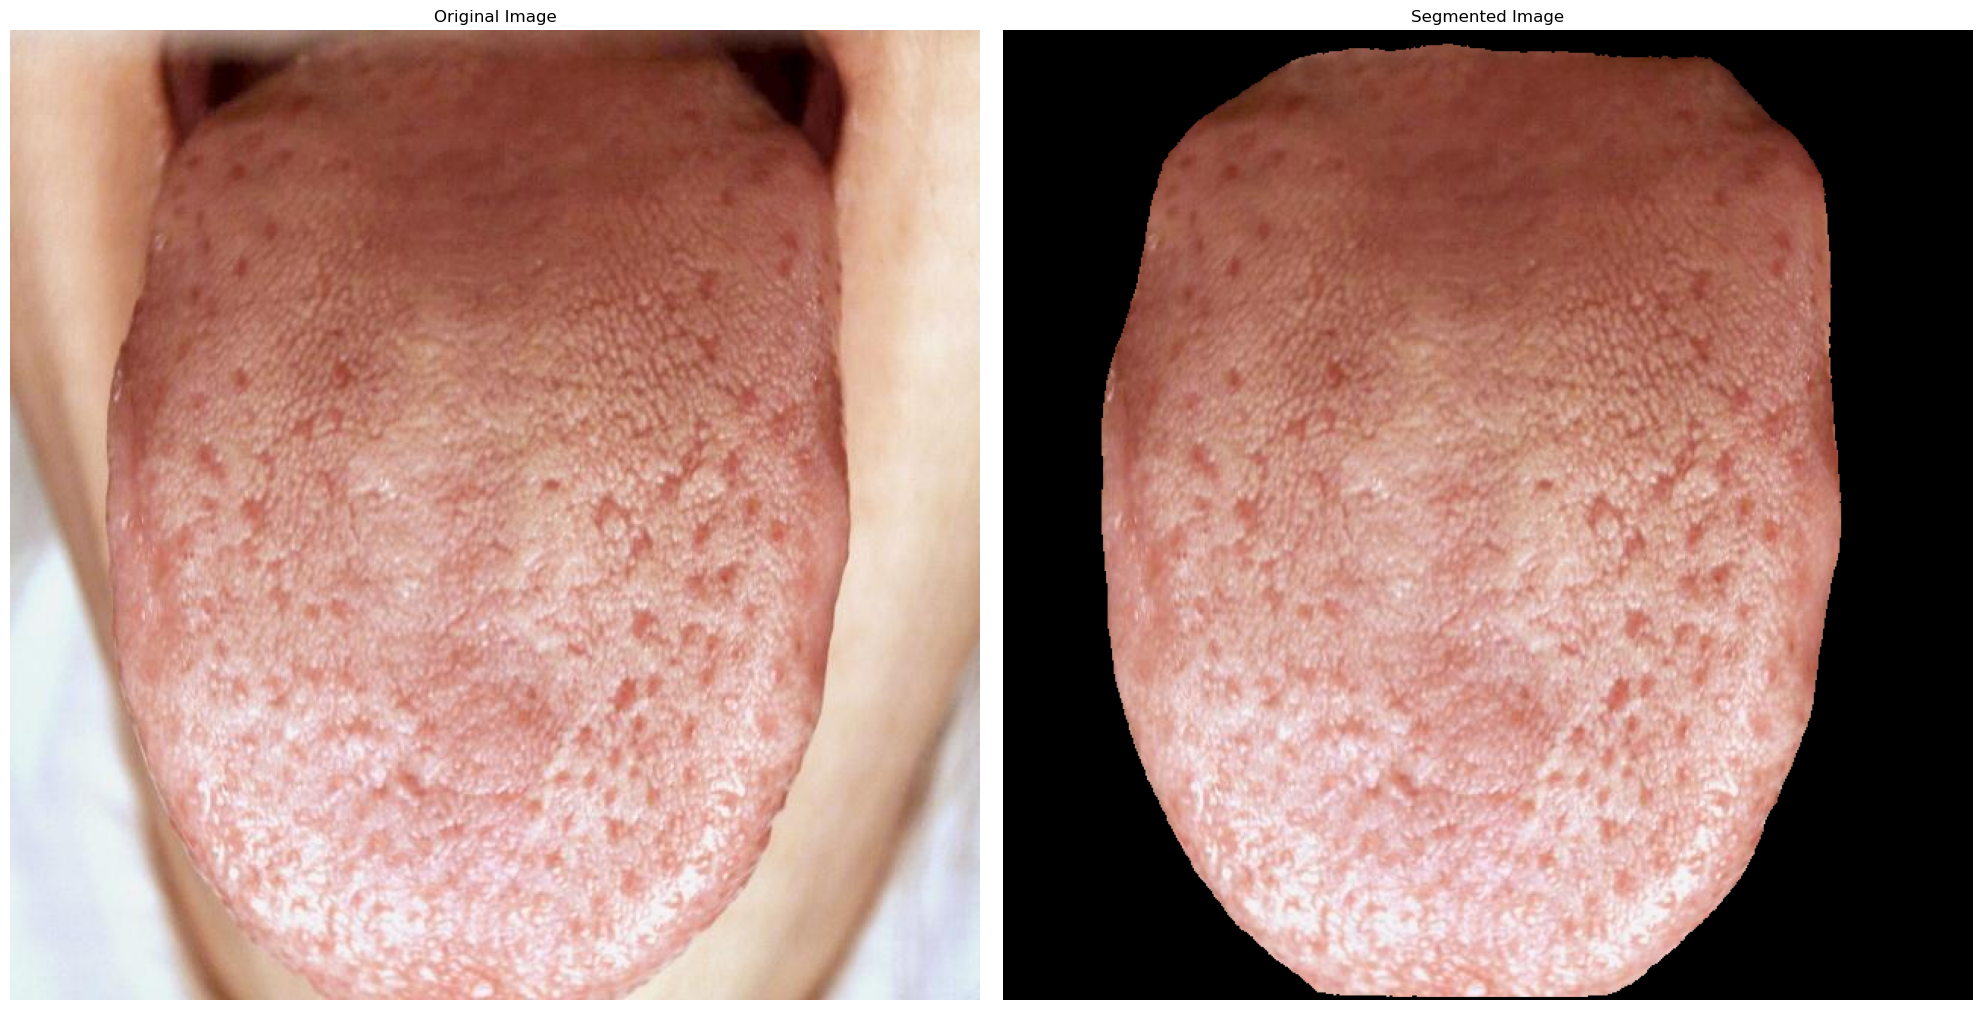

In [7]:
binary_mask = mask_pil > 0.5

rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
segmented_image = numpy_image * rgb_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(numpy_image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title('Segmented Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Optional: image saving
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

segmented_image_output = Image.fromarray(segmented_image, mode='RGB')
output_path = os.path.join(output_dir, "segmented_" + IMAGE.split("/")[-1])
segmented_image_output.save(output_path)

print(f"Segmented image saved to: {output_path}")

Segmented image saved to: output\segmented_sample_9.jpg
